# Compare best bowlers (measured by runs/wicket or runs/over) from India and Australia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
pd.set_option('chained_assignment',None)
np.seterr(divide='ignore', invalid='ignore')
%matplotlib notebook

# India's best bowlers against Australia

In [2]:
IB = pd.read_csv("india-bowling.csv")
dnd = np.array(IB["Overs"])
pos=np.squeeze(np.where(dnd=="DNB"))
ndf=IB[0:pos[0]]
ndf.head(5)
ndf.drop(['Player Link'], axis = 1, inplace = True)

In [3]:
ndf.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015


In [4]:
# add extra column runs/wicket for every player

In [5]:
rns = np.array(ndf["Runs"])
rns = rns.astype("float")
wck = np.array(ndf['Wickets'])
wck = wck.astype("int")
rnsPwck = rns/wck
rnsPwck = pd.DataFrame(rnsPwck,columns=["runs/wck"])

In [6]:
tb = [ndf,rnsPwck]
tb = pd.concat(tb,axis=1)

In [7]:
tb.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,A Mishra,2,6.0,18,5,3.00,2,New Zealand,Visakhapatnam,29 Oct 2016,3.60
1,JJ Bumrah,2,10.0,27,5,2.70,1,Sri Lanka,Pallekele,27 Aug 2017,5.40
2,B Kumar,0,9.4,42,5,4.34,1,Sri Lanka,Colombo (RPS),3 Sep 2017,8.40
3,JJ Bumrah,1,10.0,22,4,2.20,1,Zimbabwe,Harare,15 Jun 2016,5.50
4,R Ashwin,1,10.0,25,4,2.50,1,U.A.E.,Perth,28 Feb 2015,6.25


In [8]:
tb.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [9]:
#  against Australia

In [10]:
dfAus = tb[tb["Opposition"]=="Australia"]

In [11]:
dfAus = dfAus.reset_index(drop=True)
dfAus.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [12]:
dfAus.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,UT Yadav,0,9.0,72,4,8.00,1,Australia,Sydney,26 Mar 2015,18.000000
1,I Sharma,0,10.0,77,4,7.70,1,Australia,Canberra,20 Jan 2016,19.250000
2,YS Chahal,0,5.0,30,3,6.00,2,Australia,Chennai,17 Sep 2017,10.000000
3,BB Sran,0,9.2,56,3,6.00,2,Australia,Perth,12 Jan 2016,18.666667
4,UT Yadav,1,10.0,67,3,6.70,1,Australia,Canberra,20 Jan 2016,22.333333


In [13]:
# remove inf
px = np.squeeze(np.where(dfAus["runs/wck"]==np.inf))
px

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47])

In [14]:
dfAusX = dfAus[0:px[0]]
dfAusX.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,UT Yadav,0,9.0,72,4,8.00,1,Australia,Sydney,26 Mar 2015,18.000000
1,I Sharma,0,10.0,77,4,7.70,1,Australia,Canberra,20 Jan 2016,19.250000
2,YS Chahal,0,5.0,30,3,6.00,2,Australia,Chennai,17 Sep 2017,10.000000
3,BB Sran,0,9.2,56,3,6.00,2,Australia,Perth,12 Jan 2016,18.666667
4,UT Yadav,1,10.0,67,3,6.70,1,Australia,Canberra,20 Jan 2016,22.333333


In [15]:
playername = dfAusX.Player.unique()
playername

array(['UT Yadav', 'I Sharma', 'YS Chahal', 'BB Sran', 'HH Pandya',
       'Kuldeep Yadav', 'JJ Bumrah', 'RA Jadeja', 'R Ashwin', 'MM Sharma',
       'B Kumar', 'Mohammed Shami', 'AR Patel', 'R Dhawan'], dtype=object)

In [16]:
def PlayerWicketPerOver(p):
    tmpPlayer         = dfAusX[dfAusX["Player"]==p]
    tmpPlayer         = tmpPlayer.reset_index(drop=True)
    maxrunPwck        = np.max(np.array(tmpPlayer["runs/wck"]))
    totalrunPwck      = sum(np.array(tmpPlayer["runs/wck"]))
    return (maxrunPwck,totalrunPwck)

In [181]:
tbx=[]
for i in playername:
    [mxrpwck,wrpwck] = PlayerWicketPerOver(i)
    tbx.append([i,mxrpwck,wrpwck])

In [182]:
dfw = pd.DataFrame(tbx,columns=['player_name','max_runs/wicket','total_runs/wicket'])
dfw.head(5)

,player_name,max_runs/wicket,total_runs/wicket
0,UT Yadav,82.000000,257.833333
1,I Sharma,60.000000,135.750000
2,YS Chahal,10.000000,10.000000
3,BB Sran,18.666667,18.666667
4,HH Pandya,14.000000,14.000000


In [183]:
def visualize(d1,d2,title,ylb):
    data = [go.Bar(
            x=np.array(dfw[d1]),
            y=np.array(dfw[d2])
            
    )]

    layout = go.Layout(
    
            title=title,
            xaxis=dict(
            title='Players_name',
            titlefont=dict(
            family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title=ylb,
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        )
    )
    
    return (data,layout)

In [184]:
[data,layout]=visualize('player_name',"max_runs/wicket",'max runs/wicket Vs Australia',"maximum runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='a')

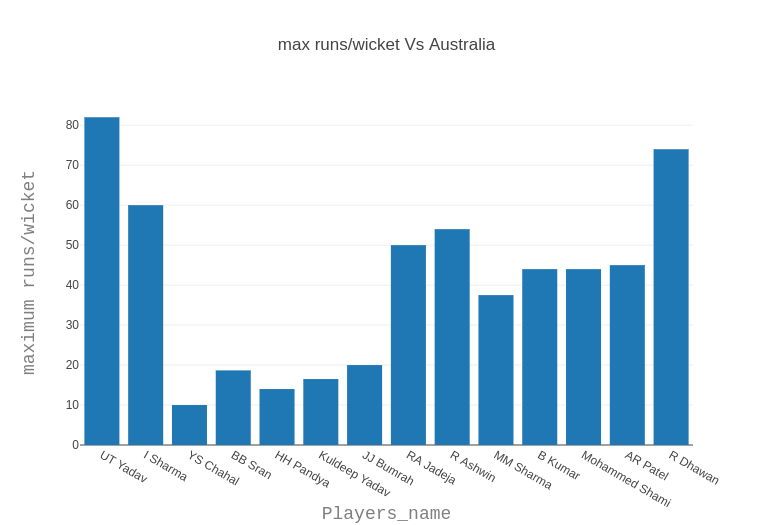

In [186]:
from IPython.display import Image
Image(filename='a.png')

In [185]:
[data,layout]=visualize('player_name',"total_runs/wicket",'Total runs/wicket Vs Australia',"total runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='b')

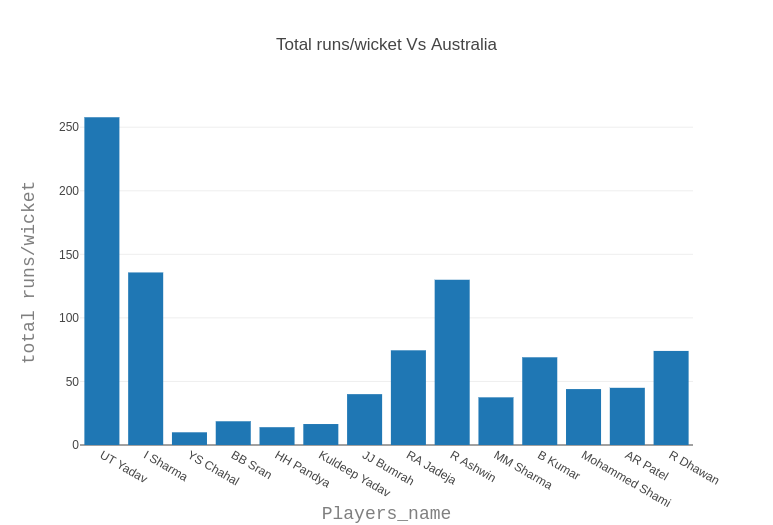

In [187]:
Image(filename='b.png')

# Australia's Best bolwers against India

In [23]:
Au  = pd.read_csv("australia-bowling.csv")
dnd = np.array(Au["Overs"])
pos = np.squeeze(np.where(dnd=="DNB"))
adf = Au[0:pos[0]]
adf.head(5)
adf.drop(['Player Link'], axis = 1, inplace = True)

In [24]:
adf.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015


In [25]:
# add extra column runs/wicket for every player

In [26]:
Arns = np.array(adf["Runs"])
Arns = Arns.astype("float")
Awck = np.array(adf['Wickets'])
Awck = Awck.astype("int")
ArnsPwck = Arns/Awck
ArnsPwck = pd.DataFrame(ArnsPwck,columns=["runs/wck"])

In [27]:
Atb = [adf,ArnsPwck]
Atb = pd.concat(Atb,axis=1)

In [28]:
Atb.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,0,9.0,28,6,3.11,2,New Zealand,Auckland,28 Feb 2015,4.666667
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
2,JW Hastings,0,10.0,45,6,4.50,1,Sri Lanka,Dambulla,31 Aug 2016,7.500000
3,JR Hazlewood,0,9.0,52,6,5.77,1,New Zealand,Birmingham,2 Jun 2017,8.666667
4,MR Marsh,0,9.0,33,5,3.66,2,England,Melbourne,14 Feb 2015,6.600000


In [29]:
dfInd = Atb[Atb["Opposition"]=="India"]

In [30]:
dfInd.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
1,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
6,KW Richardson,1,10.0,68,5,6.80,2,India,Canberra,20 Jan 2016,13.600000
20,JW Hastings,0,10.0,58,4,5.80,1,India,Melbourne,17 Jan 2016,14.500000
40,NM Coulter-Nile,0,10.0,44,3,4.40,1,India,Chennai,17 Sep 2017,14.666667
54,JP Faulkner,1,9.0,59,3,6.55,2,India,Sydney,26 Mar 2015,19.666667


In [31]:
dfInd = dfInd.reset_index(drop=True)
dfInd.columns

Index(['Player', 'Maidens', 'Overs', 'Runs', 'Wickets', 'Economy', 'Inns',
       'Opposition', 'Ground', 'Start Date', 'runs/wck'],
      dtype='object')

In [32]:
dfInd.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
1,KW Richardson,1,10.0,68,5,6.80,2,India,Canberra,20 Jan 2016,13.600000
2,JW Hastings,0,10.0,58,4,5.80,1,India,Melbourne,17 Jan 2016,14.500000
3,NM Coulter-Nile,0,10.0,44,3,4.40,1,India,Chennai,17 Sep 2017,14.666667
4,JP Faulkner,1,9.0,59,3,6.55,2,India,Sydney,26 Mar 2015,19.666667


In [33]:
# remove inf
pxx = np.squeeze(np.where(dfInd["runs/wck"]==np.inf))
pxx

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52])

In [34]:
dfIndX = dfInd[0:pxx[0]]
dfIndX.head(5)

,Player,Maidens,Overs,Runs,Wickets,Economy,Inns,Opposition,Ground,Start Date,runs/wck
0,MA Starc,2,10.0,43,6,4.30,1,India,Melbourne,18 Jan 2015,7.166667
1,KW Richardson,1,10.0,68,5,6.80,2,India,Canberra,20 Jan 2016,13.600000
2,JW Hastings,0,10.0,58,4,5.80,1,India,Melbourne,17 Jan 2016,14.500000
3,NM Coulter-Nile,0,10.0,44,3,4.40,1,India,Chennai,17 Sep 2017,14.666667
4,JP Faulkner,1,9.0,59,3,6.55,2,India,Sydney,26 Mar 2015,19.666667


In [35]:
playernameAus  = dfIndX.Player.unique()
playernameAus  

array(['MA Starc', 'KW Richardson', 'JW Hastings', 'NM Coulter-Nile',
       'JP Faulkner', 'MG Johnson', 'MP Stoinis', 'MR Marsh', 'JS Paris',
       'JR Hazlewood', 'GS Sandhu', 'SM Boland', 'A Zampa', 'NM Lyon'], dtype=object)

In [36]:
def PlayerWicketPerOverAus(p):
    tmpPlayer         = dfIndX[dfIndX["Player"]==p]
    tmpPlayer         = tmpPlayer.reset_index(drop=True)
    maxrunPwck        = np.max(np.array(tmpPlayer["runs/wck"]))
    totalrunPwck      = sum(np.array(tmpPlayer["runs/wck"]))
    return (maxrunPwck,totalrunPwck)

In [37]:
tba=[]
for i in playernameAus:
    [mxrpwck,wrpwck] = PlayerWicketPerOverAus(i)
    tba.append([i,mxrpwck,wrpwck])

In [38]:
dfwAus = pd.DataFrame(tba,columns=['player_name','max_runs/wicket','total_runs/wicket'])
dfwAus.head(5)

,player_name,max_runs/wicket,total_runs/wicket
0,MA Starc,14.000000,32.166667
1,KW Richardson,48.000000,61.600000
2,JW Hastings,46.000000,105.833333
3,NM Coulter-Nile,14.666667,14.666667
4,JP Faulkner,67.000000,274.666667


In [39]:
def visualize(d1,d2,title,ylb):
    data = [go.Bar(
            x=np.array(dfwAus[d1]),
            y=np.array(dfwAus[d2])
            
    )]

    layout = go.Layout(
    
            title=title,
            xaxis=dict(
            title='Players_name',
            titlefont=dict(
            family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title=ylb,
            titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        )
    )
    
    return (data,layout)

In [179]:
[data,layout]=visualize('player_name',"max_runs/wicket",'max runs/wicket Vs India',"maximum runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='x')

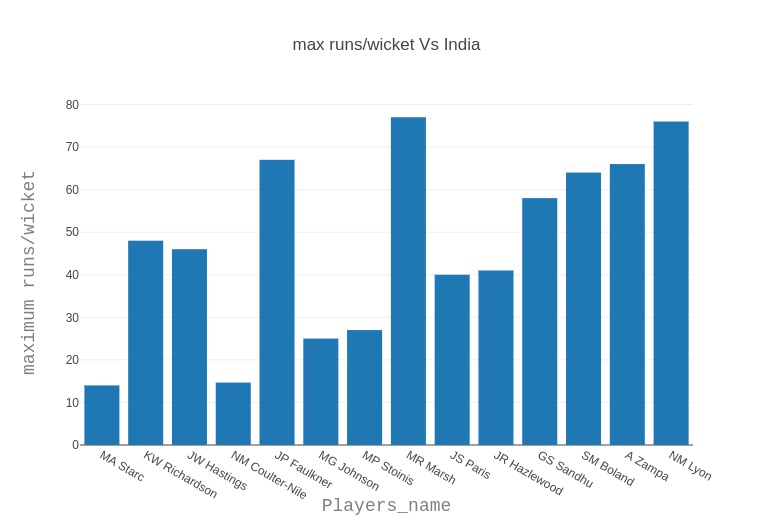

In [188]:
Image(filename='c.png')

In [178]:
[data,layout]=visualize('player_name',"total_runs/wicket",'Total runs/wicket Vs India',"total runs/wicket")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='y')

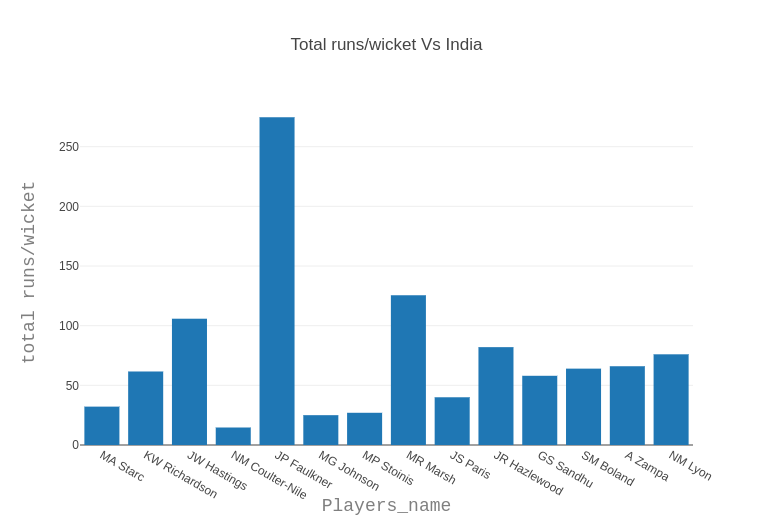

In [189]:
Image(filename='d.png')

# Bowler Analysis India

In [42]:
IndPlayername = dfAusX.Player.unique()

In [133]:
def compIND(i):    
    tmp             = dfAusX[dfAusX["Player"]==i]
    tmp             = tmp.reset_index(drop=True)
    totalInns       = sum(np.array(tmp["Inns"]).astype("int"))
    totalRuns       = sum(np.array(tmp["Runs"]).astype("int"))
    totalWicket     = sum(np.array(tmp["Wickets"].astype("int")))
    wickPnns        = (totalWicket/totalInns)
    runPwck         = (totalRuns/totalWicket)
    return (totalInns,totalRuns,totalWicket,wickPnns,runPwck )

In [134]:
tbInd=[]
for i in IndPlayername :
    [totalInns,totalRuns,totalWicket,wickPnns,runPwck] = compIND(i)
    tbInd.append([i,totalInns,totalRuns,totalWicket,wickPnns,runPwck ])

In [135]:
tbInd = pd.DataFrame(tbInd,columns=["players","totalInns","totalRuns","totalWicket",
                                    "wickPInns","runsPwck"])
tbInd

,players,totalInns,totalRuns,totalWicket,wickPInns,runsPwck
0,UT Yadav,9,418,13,1.444444,32.153846
1,I Sharma,6,250,9,1.500000,27.777778
2,YS Chahal,2,30,3,1.500000,10.000000
3,BB Sran,2,56,3,1.500000,18.666667
4,HH Pandya,2,28,2,1.000000,14.000000
5,Kuldeep Yadav,2,33,2,1.000000,16.500000
6,JJ Bumrah,3,60,3,1.000000,20.000000
7,RA Jadeja,4,99,3,0.750000,33.000000
8,R Ashwin,5,164,4,0.800000,41.000000
9,MM Sharma,1,75,2,2.000000,37.500000


In [152]:
thresholdInd = np.array(tbInd['totalInns'].astype("int"))
thresholdInd = np.floor(np.mean(thresholdInd))
thresholdInd

3.0

# Best bowler India

In [138]:
ti1 = tbInd.loc[tbInd['totalInns'] >= thresholdInd]
ti1.reset_index(drop=True)
ti1 = ti1.sort_values(['wickPInns'],ascending=[False])
ti1 = ti1.reset_index(drop=True)
ti1

,players,totalInns,totalRuns,totalWicket,wickPInns,runsPwck
0,I Sharma,6,250,9,1.500000,27.777778
1,UT Yadav,9,418,13,1.444444,32.153846
2,JJ Bumrah,3,60,3,1.000000,20.000000
3,R Ashwin,5,164,4,0.800000,41.000000
4,RA Jadeja,4,99,3,0.750000,33.000000
5,B Kumar,4,69,2,0.500000,34.500000


In [158]:
x11  = np.array(ti1['wickPInns'].astype("float"))
y11  = np.array(ti1['runsPwck'].astype("float"))
nInd = np.array(ti1['players'])

<IPython.core.display.Javascript object>


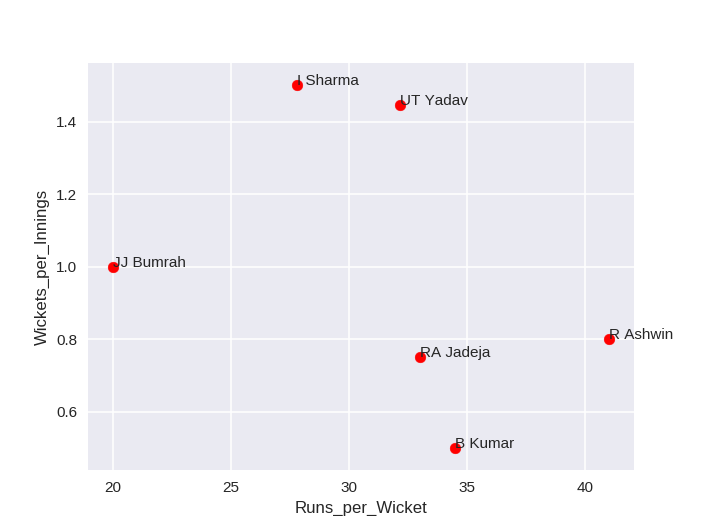

In [177]:
fig, ax = plt.subplots()
ax.scatter(y11,x11,color=['red'])

for i, txt in enumerate(nInd):
    ax.annotate(txt, (y11[i],x11[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")

# Bowler Analysis Austrlia

In [125]:
AusPlayername = dfIndX.Player.unique()

In [126]:
def compAUS(i):    
    tmp             = dfIndX[dfIndX["Player"]==i]
    tmp             = tmp.reset_index(drop=True)
    totalInns       = sum(np.array(tmp["Inns"]).astype("int"))
    totalRuns       = sum(np.array(tmp["Runs"]).astype("int"))
    totalWicket     = sum(np.array(tmp["Wickets"].astype("int")))
    wickPnns        = (totalWicket/totalInns)
    runPwck         = (totalRuns/totalWicket)
    return (totalInns,totalRuns,totalWicket,wickPnns,runPwck)

In [127]:
tbAus=[]
for i in AusPlayername:
    [totalInns,totalRuns,totalWicket,wickPnns,runPwck] = compAUS(i)
    tbAus.append([i,totalInns,totalRuns,totalWicket,wickPnns,runPwck])

In [128]:
tbAus = pd.DataFrame(tbAus,columns=["players","totalInns","totalRuns","totalWicket",
                                    "wickPInns","runPwck"])
tbAus

,players,totalInns,totalRuns,totalWicket,wickPInns,runPwck
0,MA Starc,4,82,9,2.250000,9.111111
1,KW Richardson,3,116,6,2.000000,19.333333
2,JW Hastings,6,215,10,1.666667,21.500000
3,NM Coulter-Nile,1,44,3,3.000000,14.666667
4,JP Faulkner,7,376,10,1.428571,37.600000
5,MG Johnson,2,50,2,1.000000,25.000000
6,MP Stoinis,1,54,2,2.000000,27.000000
7,MR Marsh,5,153,4,0.800000,38.250000
8,JS Paris,1,40,1,1.000000,40.000000
9,JR Hazlewood,3,82,2,0.666667,41.000000


In [150]:
thresholdAus = np.array(tbAus['totalInns'].astype("int"))
thresholdAus = np.floor(np.mean(thresholdAus))

In [151]:
thresholdAus

2.0

# Best bowlers Australia

In [139]:
ti2 = tbAus.loc[tbAus['totalInns'] >= thresholdInd]
ti2.reset_index(drop=True)
ti2 = ti2.sort_values(['wickPInns'],ascending=[False])
ti2 = ti2.reset_index(drop=True)
ti2

,players,totalInns,totalRuns,totalWicket,wickPInns,runPwck
0,MA Starc,4,82,9,2.250000,9.111111
1,KW Richardson,3,116,6,2.000000,19.333333
2,JW Hastings,6,215,10,1.666667,21.500000
3,JP Faulkner,7,376,10,1.428571,37.600000
4,MR Marsh,5,153,4,0.800000,38.250000
5,JR Hazlewood,3,82,2,0.666667,41.000000


In [154]:
x21  = np.array(ti2['wickPInns'].astype("float"))
y21  = np.array(ti2['runPwck'].astype("float"))
nAus = np.array(ti2['players'])

<IPython.core.display.Javascript object>


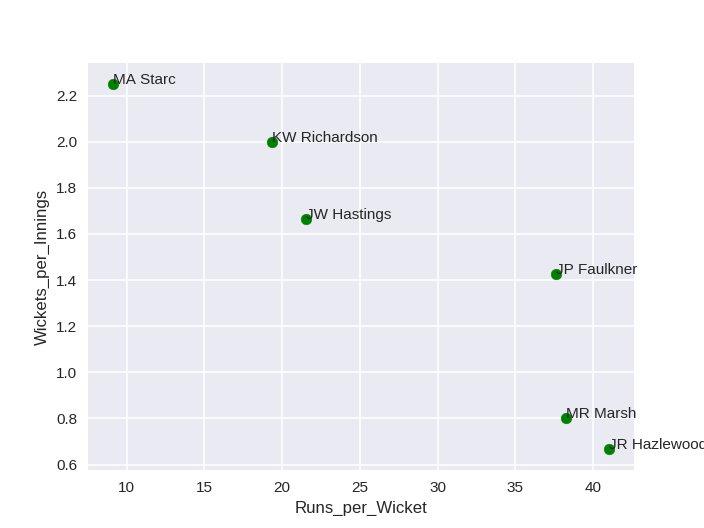

In [176]:
fig, ax = plt.subplots()
ax.scatter(y21,x21,color=['green'])

for i, txt in enumerate(nAus):
    ax.annotate(txt, (y21[i],x21[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")

# Comparism

In [171]:
X = np.concatenate((x11,x21))
Y = np.concatenate((y11,y21))
Z = np.concatenate((nInd,nAus))

<IPython.core.display.Javascript object>


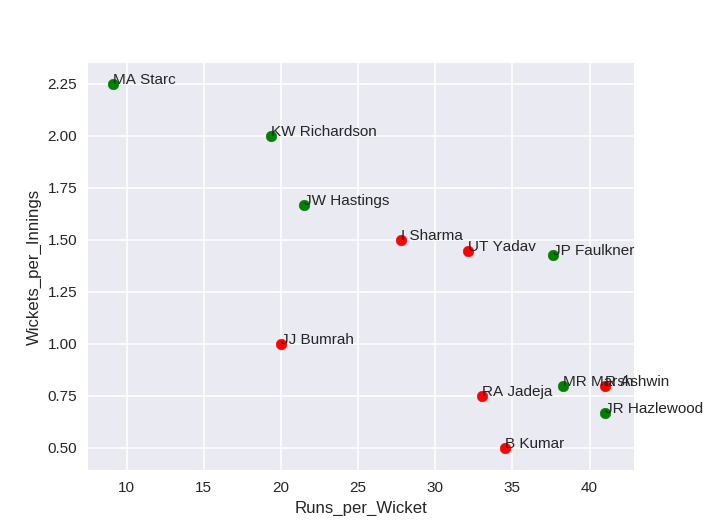

In [175]:
fig, ax = plt.subplots()
#ax.scatter(Y,X)
ax.scatter(y21,x21,color=['green'])
ax.scatter(y11,x11,color=['red'])

for i, txt in enumerate(Z):
    ax.annotate(txt, (Y[i],X[i]))
plt.xlabel("Runs_per_Wicket")
plt.ylabel("Wickets_per_Innings")